In [114]:
import pickle
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from parameters import setParams
from main import Replay_Sim

In [115]:
# dictionary of the different replay strategies (models)
models_dict = {'EVB': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': False},
               'gain_only': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': True},
               'need_only': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': False},
               'dyna': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'no_replay': {'n_plan': 0, 'set_gain_to_one': True, 'set_need_to_one': True},
               'prioritized_sweeping': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               }

In [126]:
def extract_data(maze, print_info=True):
    model_data = {}
    counter = 0
    for model in models_dict:
        model_data[model] = {}
        counter += 1
        file_list = [file for file in glob.glob(os.path.join('checkpoints', maze, model + '*'))]
        for k, file in enumerate(file_list):
            with open(file, 'rb') as f:
                model_data[model][k] = pickle.load(f)
        if counter == 1:
            if print_info:
                print('maze: ', maze)
                params_dict = model_data[model][k].params_dict
            for key in params_dict:
                print(key, ': ', params_dict[key])
    return model_data, params_dict

In [117]:
def plot_steps_to_goal(maze, model_data, params_dict):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Steps per Episode'
    plt.title(fig_title)
    plt.ylabel('Number of steps to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    steps_per_episode = {}
    for model in models_dict:
        steps_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            steps_per_episode[model][k] = model_data[model][k].steps_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(steps_per_episode[model], axis=0)
        spe_stds = np.std(steps_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
    fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [118]:
def plot_time_to_goal(maze, model_data, params_dict):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Total Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    time_per_episode = {}
    for model in models_dict:
        time_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            time_per_episode[model][k] = model_data[model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(time_per_episode[model], axis=0)
        spe_stds = np.std(time_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
    fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [119]:
def plot_total_time_log(maze, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Total Time per Episode (log)'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    time_per_episode = {}
    for model in models_dict:
        time_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            time_per_episode[model][k] = model_data[model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(np.log(time_per_episode[model]), axis=0)
        spe_stds = np.std(np.log(time_per_episode[model]), axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
    fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [120]:
def plot_plan_time(maze, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Planning Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    plan_times_per_episode = {}
    for model in models_dict:
        plan_times_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            plan_times_per_episode[model][k] = model_data[model][k].times_for_planning      
        # plot figure for model across all simulations
        spe_means = np.nanmean(plan_times_per_episode[model], axis=0)
        spe_stds = np.std(plan_times_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
    fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [140]:
def plot_EVB_time(maze, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Average EVB Computation Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    mean_EVB_times_per_episode = {}
    for model in models_dict:
        mean_EVB_times_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            # take the EVB per episode averaged over all planning steps
            mean_EVB_times_per_episode[model][k] = np.nanmean(model_data[model][k].times_for_EVB, axis=1)
        # plot figure for model across all simulations
        spe_means = np.nanmean(mean_EVB_times_per_episode[model], axis=0)
        spe_stds = np.std(mean_EVB_times_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
        fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [153]:
def plot_gain_time(maze, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Average Gain Computation Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    mean_gain_times_per_episode = {}
    for model in models_dict:
        mean_gain_times_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            # take the EVB per episode averaged over all planning steps
            mean_gain_times_per_episode[model][k] = np.nanmean(model_data[model][k]['times_for_gain'], axis=1)
        # plot figure for model across all simulations
        spe_means = np.nanmean(mean_gain_times_per_episode[model], axis=0)
        spe_stds = np.std(mean_gain_times_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
        fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

In [146]:
def plot_need_time(maze, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Average Need Computation Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    mean_need_times_per_episode = {}
    for model in models_dict:
        mean_need_times_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            # take the EVB per episode averaged over all planning steps
            mean_need_times_per_episode[model][k] = np.nanmean(model_data[model][k].times_for_need, axis=1)
        # plot figure for model across all simulations
        spe_means = np.nanmean(mean_need_times_per_episode[model], axis=0)
        spe_stds = np.std(mean_need_times_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    maze_path = os.path.join('checkpoints', maze)
    maze_fig_path = os.path.join(maze_path, 'figures')
    if 'figures' not in os.listdir(maze_path):
        os.mkdir(maze_fig_path)
        fig.savefig(maze_fig_path + '/{}.png'.format(file_name), dpi=2000)

# PART 1:
# Mattar Maze

In [121]:
# extract all of the simulation data for this experiment (i.e. maze)
maze = 'mattar'
model_data, params_dict = extract_data(maze)

maze:  mattar
N_SIMULATIONS :  30
MAX_N_STEPS :  10000000
MAX_N_EPISODES :  40
actPolicy :  softmax
gamma :  0.9
alpha :  1.0
lamb :  0
TLearnRate :  0.9
softmaxInvT :  5
epsilon :  0.05
PS_thresh :  0
preExplore :  True
Tgoal2start :  True
rewOnlyPositive :  True
onVSoffPolicy :  off-policy
nPlan :  20
EVMthresh :  0
expandFurther :  True
planPolicy :  softmax
planOnlyAtGorS :  True
change_goal :  True
plan_at_prev_goal :  True
baselineGain :  1e-10
tieBreak :  min
onlineVSoffline :  online
remove_samestate :  True
allowLoops :  False
copyQinPlanBkps :  False
setAllGainToOne :  False
setAllNeedToOne :  False
setAllNeedToZero :  False
plot_agent :  False
plot_Q :  False
maze :  [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
s_start :  [[2 0]]
s_start_rand :  False
s_end :  [[0 8]]
s_end_change :  [[5 0]]
rewMag :  [[1]]
rewSTD :  [[0.1]]
rewProb :  [[1]]

## Steps per episode

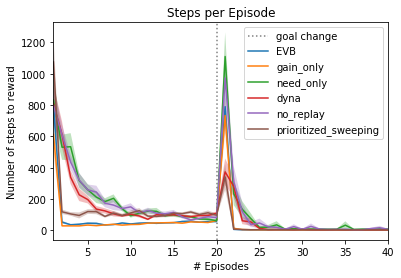

In [122]:
# plot average number of steps to goal (i.e. per episode) for each model
plot_steps_to_goal(maze, model_data, params_dict)

## Total time per episode

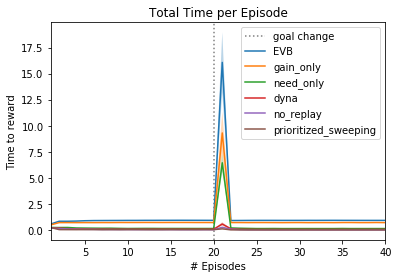

In [123]:
# plot average total time to goal (i.e. per episode) for each model
plot_time_to_goal(maze, model_data, params_dict)

## Total time per episode (log)

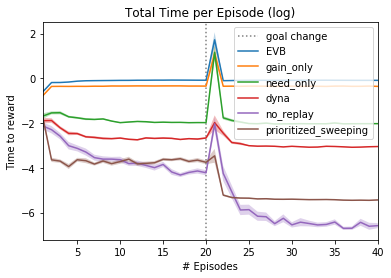

In [124]:
# plot average logarithm of the total (i.e. per episode) for each model
plot_total_time_log(maze, model_data)

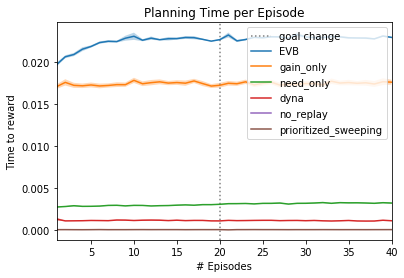

In [152]:
# plot average planning times (i.e. per episode) for each model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    plot_plan_time(maze, model_data)

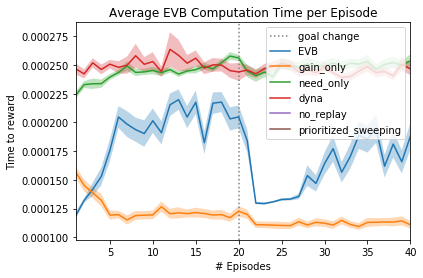

In [151]:
# plot average EVB planning times (i.e. per episode) for each model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    plot_EVB_time(maze, model_data)

TypeError: 'Replay_Sim' object is not subscriptable

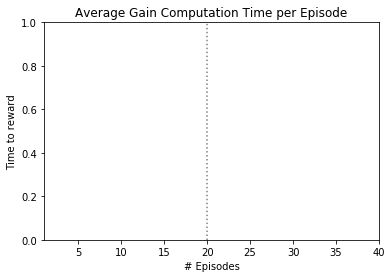

In [155]:
# plot average gain times (i.e. per episode) for each model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    plot_gain_time(maze, model_data)

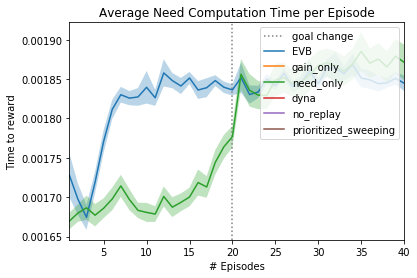

In [149]:
# plot average need times (i.e. per episode) for each model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    plot_need_time(maze, model_data)

In [ ]:
# TO DO:
# 0) Create plots for ALL mazes
# 1) Create module for analysis functions, maybe as a class. And clean up into 3 or so methods/functions (i.e. inputs: plan/total, log T/F, gain/EVB/need etc.).
# 3) Qualitatively observe what EVB and gain are doing after change in goal location (does the agent keep going back to the goal location)?
# 4) Qualitatively observe Q value depreciation between EVB, PS, gain, need